<center> <h1>用Python做深度学习（Keras）</h1> </center>


<p style="text-align:right">Aug 6th, 2021</p>


Keras 是一个高级的 (high-level) 深度学习框架，作者是 François Chollet。Keras 可以以两种方法运行：

1. 以 TensorFlow, CNTK, 或者 Theano 作为后端 (backend) 运行

2. 在 TensorFlow 里面直接运行 tf.keras

In [11]:
from IPython.display import Image

In [14]:
Image(url= "contents/keras-pic.png", width=800, height=150)

我们用的是 TensorFlow 下面的 Keras，不过在本贴不会涉及任何关于 TensorFlow 的内容，只单单讲解 tf.keras 下面的内容。首先引入 tensorflow 和 keras。

In [15]:
import tensorflow as tf
import tensorflow.keras as keras

Keras 是深度学习框架，里面有各种深度学习模型，介绍它之前让我们先回忆下它的好兄弟 - 机器学习框架 Scikit-Learn。

### Scikit-Learn

在 Scikit-Learn 里完整的一套流程如下：

In [17]:
Image(url= "contents/sklearn-process.png", width=800, height=150)

数据是不可缺少的，Scikit-Learn 里面也有不少自带数据集。大家应该还记得 Scikit-Learn 里面的三大核心 API 吧：估计器（<font color='pink'><b>estimator</b></font> ），预测器（<font color='pink'><b>predictor</b></font>）和转换器（<font color='pink'><b>transformer</b></font>）。从上图看估计器用来构建模型和拟合模型，而预测器用来评估模型。而转换器一般用来做数据预处理得到干净的 X_train 和 y_train。

除了数据和模型，要完成一个任务还需定义<font color='pink'><b>损失函数</b></font>（loss function）和指定<font color='pink'><b>算法</b></font>（algorithm），它们都隐藏在 Scikit-Learn 的具体模型中，比如

* LinearRegression 模型用的是 mean_square_error 损失函数，用梯度下降算法

* LogisticRegression 模型用的是 cross_entropy 损失函数，用梯度下降算法

损失函数和算法都会在 Keras 里面都会显性定义出来，带着上面 Scikit-Learn 的图，让我们来看看 Keras 的高层流程。

### Keras

Keras 里面的模型都是神经网络，而神经网络都是一层一层（layer by layer）叠加起来的，在Keras 里完整的一套流程如下：

In [18]:
Image(url= "contents/keras-process.png", width=800, height=150)

总共分五步：

1. **引入数据**：和 Scikit-Learn 操作一样

* 用 numpy 数据

* 引用自带数据

2. **构建模型**：用 Keras 构建模型就类似把每层当积木连起来称为一个网络， 连接的方法有三种：

* 序列式（sequential）

* 函数式（functional）

* 子类化（subclassing）

3. **编译模型**：这是 Scikit-Learn 里面没有的，显性定义出损失函数（loss）、优化方法（optimizer）和监控指标（metrics）。

4. **拟合模型**：和 Scikit-Learn 里的估计器类似，但可以额外设定 epoch 数量、是否包含验证集、设定调用函数里面的指标，等等。

5. **评估模型**：和 Scikit-Learn 里的预测器类似。

<center> <h1>Keras 数据</h1> </center>

Keras 的数据格式就是 numpy array。

机器学习 (深度学习) 中用到的数据，包括结构性数据 (数据表) 和非结构性数据 (序列、图片、视屏) 都是张量，总结如下：

* 数据表-2D 形状 = (<font color="red">样本数</font>，特征数)

* 序列类-3D 形状 = (<font color="red">样本数</font>，步长，特征数)

* 图像类-4D 形状 = (<font color="red">样本数</font>，宽，高，通道数)

* 视屏类-5D 形状 = (<font color="red">样本数</font>，帧数，宽，高，通道数)

机器学习，尤其深度学习，需要大量的数据，因此<font color="red">样本数</font>肯定占一个维度，惯例我们把它称为维度 1。这样机器学习要处理的张量至少从 2 维开始。

### 2D数据表

2 维张量就是矩阵，也叫数据表，一般用 csv 存储。

In [20]:
Image(url= "contents/2d-data.png", width=800, height=150)

这套房屋 21,000 个数据包括其价格 (y)，平方英尺，卧室数，楼层，日期，翻新年份等等 21 栏。该数据形状为 (21000, 21)。传统机器学习的线性回归可以来预测房价。

In [21]:
Image(url= "contents/2d-data2.png", width=800, height=150)

### 3D数据表

推特 (twitter) 的每条推文 (tweet) 规定只能发 280 个字符。在编码推文时，将 280 个字符的序列用独热编码 (one-hot encoding) 到包含 128 个字符的 ASCII 表，如下所示。

In [23]:
Image(url= "contents/3d-data-ascii.png", width=800, height=150)

这样，每条推文都可以编码为 2 维张量形状 (280, 128)，比如一条 tweet 是 "<font color="pink"><b>I love python :)</b></font>"，这句话映射到 ASCII 表变成：

In [25]:
Image(url= "contents/3d-data-ascii2.png", width=800, height=150)

如果收集到 1 百万条推文，那么整个数据集的形状为 (1000000, 280, 128)。传统机器学习的对率回归可以来做情感分析。

3 维张量的数据表示图如下：

In [26]:
Image(url= "contents/3d-data-ascii3.png", width=800, height=150)

### 4D 图像数据

图像通常具有 3 个维度：宽度，高度和颜色通道。虽然是黑白图像 (如 MNIST 数字) 只有一个颜色通道，按照惯例，我们还是把它当成 4 维，即颜色通道只有一维。

* 一组黑白照片可存成形状为 (样本数，宽，高，<font color="red">1</font>) 的 4 维张量

* 一组彩色照片可存成形状为 (样本数，宽，高，<font color="blue">3</font>) 的 4 维张量

In [28]:
Image(url= "contents/4d-data1.png", width=800, height=150)

通常 0 代表黑色，255 代表白色。

4 维张量的数据表示图如下：

In [29]:
Image(url= "contents/4d-data2.png", width=800, height=150)

### 5D 视频数据

视频可以被分解成一幅幅帧 (frame)。

* 每幅帧就是彩色图像，可以存储在形状是 (宽度，高度，通道) 的 3D 张量中

* 视频 (一个序列的帧) 可以存储在形状是 (<font color="red">帧数</font>，宽度，高度，通道) 的 4D 张量中

* 一批不同的视频可以存储在形状是 (<font color="blue">样本数</font>，<font color="red">帧数</font>，宽度，高度，通道) 的 5D 张量中

下面一个 9:42 秒的 1280 x 720 油管视屏 (哈登三分绝杀勇士)，被分解成 40 个样本数据，每个样本包括 240 帧。这样的视频剪辑将存储在形状为 (<font color="blue">40</font>, <font color="red">240</font>, 1280, 720, 3) 的张量中。

In [31]:
Image(url= "contents/5d-data1.png", width=800, height=150)

5 维张量的数据表示图如下：

In [33]:
Image(url= "contents/5d-data2.png", width=800, height=150)

### 自带数据集

和 Scikit-Learn 一样，Keras 本身也自带数据集，从其官网中收集到 7 套。

1. Boston housing price regression dataset
2. CIFAR10 small image classification
3. CIFAR100 small image classification
4. IMDB Movie reviews sentiment classification
5. Reuters newswire topics classification
6. MNIST database of handwritten digits
7. Fashion-MNIST database of fashion articles


想了解数据的具体描述，去 **https://keras.io/datasets/** 链接。

![SegmentLocal](contents/default-data1.gif "segment")

### 数据切分

对于以上用 numpy 自定义的各种维度的数据集 (X, y)，用 Scikit-Learn 的子包 model_selection 里的 train_test_split 函数，代码如下：

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
```

<center> <h1>Keras 里的神经网络</h1> </center>

组成神经网络的四个方面：

1. <font color="pink"><b>层</b></font>（layers）和<font color="pink"><b>模型</b></font>（models）

2. <font color="pink"><b>输入</b></font>（input）和<font color="pink"><b>输出</b></font>（output）

3. <font color="pink"><b>损失函数</b></font>（loss）

4. <font color="pink"><b>优化器</b></font>（optimizer）

多个<font color="pink"><b>层</b></font>链接在一起组成了<font color="pink"><b>模型</b></font>，将<font color="pink"><b>输入</b></font>数据映射为预测值。然后<font color="pink"><b>损失函数</b></font>将这些预测值<font color="pink"><b>输出</b></font>，并与目标进行比较，得到损失值，用于衡量网络预测值与预期结果的匹配程度。<font color="pink"><b>优化器</b></font>使用这个损失值来更新网络的权重。

下图给出模型、层、输入、输出、损失函数和优化器之间的关系：

In [41]:
Image(url= "contents/network1.png", width=800, height=150)

### 层

神经网络里面的基本数据结构是层，而 Keras 里 layers 也是最基本的模块。

不同数据格式或不同数据处理类型需要用到不同的层，比如

* 形状为 (样本数，特征数) 的 2D 数据用<font color="pink"><b>全连接层</b></font>，对应 Keras 里面的 Dense

* 形状为 (样本数，步长，特征数) 的 3D 序列数据用<font color="pink"><b>循环层</b></font>，对应 Keras 里面的 RNN, GRU 或 LSTM

* 形状为 (样本数，宽，高，通道数) 的 4D 图像数据用<font color="pink"><b>二维卷积层</b></font>，对应 Keras 里面的 Conv2D 

等等。。。

### 模型

深度学习模型是层构成的有向无环图。最常见的例子就是层的线性堆叠，将单一输入映射为单一输出（single input to single output）。

此外，神经网络还有更复杂的结构，比如

<center> <h3><font color="pink">多输入（multi-input）模型</font></h3> </center>

用数值型和类别型的数据（下图左边），和图像数据（下图右边）一起来预测房价。

In [43]:
Image(url= "contents/network-model1.png", width=800, height=150)

<center> <h3><font color="pink">多输出（multi-output）模型</font></h3> </center>

根据图像数据来识别物体（下图左分支）和颜色（下图右分支）。

In [45]:
Image(url= "contents/network-model2.png", width=800, height=150)

### 损失函数

在 Keras 里将<font color="pink"><b>层</b></font>连成<font color="pink"><b>模型</b></font>确定网络架构后，你还需要选择以下两个参数，选择<font color="pink"><b>损失函数</b></font>和设定<font color="pink"><b>优化器</b></font>。

在训练过程中需要将最小化<font color="pink"><b>损失函数</b></font>，这它是衡量当前任务是否已成功完成的标准。

对于分类、回归、序列预测等常见问题，你可以遵循一些简单的指导原则来选择正确的损失函数。

* 对于二分类问题，用二元交叉熵（binary crossentropy）损失函数

* 对于多分类问题，用分类交叉熵（categorical crossentropy）损失函数

* 对于回归问题，用均方误差（mean-squared error）损失函数

* 对于序列学习问题，用联结主义时序分类（CTC，connectionist temporal classification）损失函数

有时在面对真正全新的问题时，你还需要自主的设计损失函数，但这个超出本帖的范围了，以后再讲。

### 优化器

优化器决定如何基于损失函数对网络进行更新。它执行的是随机梯度下降（stochastic gradient descent，SGD）方法或其变体，目前 Keras 优化器包括

* Adagrad

* Adadelta

* RMSprop

* Adam

* AdaMax

* Nadam

* AMSGrad

具体每个方法就不细讲了，对算法感兴趣的读者可参考链接 **http://ruder.io/optimizing-gradient-descent/**.

借用 Ruder 大神上面文章里的两幅动图对比各种优化算法的表现，图一对比他们在鞍点（saddle point）处的收敛到最优值的速度，SGD 没有收敛，图二从损失函数等值线（contour）看收敛速度，SGD 最慢。

![SegmentLocal](contents/optimizer1.gif "optimizer1")

![SegmentLocal](contents/optimizer2.gif "optimizer2")

<center> <h1>Keras 构建模型</h1> </center>

本节分别用序列式、函数书和子类化，配着 Fashion-MNIST 数据集构建模型，注意为了便于说明 Keras 语法特征，我故意只构建个简单模型，可能不实际，比如分类 Fashion-MNIST，用卷积效果网络好些，干嘛只用全连接网络举例？

一切只是便于解说基本核心概念。这些基本点弄清楚了，构建复杂模型和构建简单模型没任何区别。

### 序列式建模

序列式（sequential）建模有两种方式。

<center> <h3><font color="pink">方式 1
</font></h3> </center>

用全连接网络（fully-connected neural network, FCNN）来建模，代码如下：

```
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
```

首先用 Sequential() 创建一个空模型 ，这个没办法，硬着记住吧。

接下来就像搭积木一样，用 add() 函数一层层加 layers，这个操作用代码写出来很自然，但是 layers 有很多种，这里用了两种：

* Flatten：顾名思义，就是通过「Flatten 层」把高维数据打平成低维数据，做的就是下图的事。

In [57]:
Image(url= "contents/build-model1.png", width=500, height=100)

* Dense：顾名思义，就是通过「Dense 层」把前一层每一个神经元和后一层神经元（除了偏置）两两相连，如下图：

In [59]:
Image(url= "contents/build-model2.png", width=500, height=100)

层的大方向弄清楚后，让我们看看里面的参数

* Flatten( <font color="red">input_shape=[28,28]</font> )

* Dense( <font color="red">100</font>, <font color="blue">activation='relu'</font> )

* Dense( <font color="red">10</font>, <font color="blue">activation='softmax'</font> ) 

每个层的第一个参数都是设定该层输出数据的维度。比如

* Flatten 层输出形状 <font color="red">784</font> 的一维数据

* 第一个 Dense 层输出形状 <font color="red">100</font> 的一维数据

* 第二个 Dense 层输出形状 <font color="red">10</font> 的一维数据

在 Keras 里不需要设定该层输入数据的维度，为什么呢？很简单，上一层的输出数据维度 = 该层的输入数据维度！Keras 会自动帮你连起来，那么

* Flatten 层接受形状 <font color="red">28 × 28</font> 的二维数据，输出形状 <font color="red">784</font> 的一维数据

* 第一个 Dense 层接受形状 <font color="red">100</font> 的一维数据，输出形状 <font color="red">10</font> 的一维数据

* 第二个 Dense 层接受形状 <font color="red">10</font> 的一维数据，输出形状 <font color="red">10</font> 的一维数据

每个层（除了 Flatten 层）的第二个参数设定了<font color="blue"><b>激活函数</b></font>的方式，比如

* 第一个 Dense 层用 <font color="blue">relu</font>，防止梯度消失

* 第二个 Dense 层用 <font color="blue">softmax</font>，因为 Fashion-MNIST 是个多分类问题

In [60]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


该模型自动被命名 sequential，接着一张表分别描述每层的名称类型（layer (type)）、输出形状（Output Shape）和参数个数（Param #）。我们一层层来看

1. Flatten 层被命名为 flatten

> a. 输出形状是 (<font color="pink"><b>None</b></font>, 784)，784 好理解，就是 28×28 打平之后的维度，这个 <font color="pink"><b>None</b></font> 其实是样本数，更严谨的讲是一批 (batch) 里面的样本数。为了代码简洁，这个「0 维」的样本数在建模时通常不需要显性写出来。

> b. 参数个数为 0，因为打平只是重塑数组，不需要任何参数来完成重塑动作。

2. 第一个 Dense 层被命名为 dense

> a. 输出形状是 (<font color="pink"><b>None</b></font>, 100)，好理解。

> b. 参数个数为 78500，为什么不是 784×100 = 78400 呢？别忘了<font color="pink"><b>偏置项</b></font>（bias）哦，(784+<font color="pink"><b>1</b></font>)×100 = 78500。

3. 第二个 Dense 层被命名为 dense_1

> a. 输出形状是 (<font color="pink"><b>None</b></font>, 10)，好理解。

> b. 参数个数为 1010，考虑<font color="pink"><b>偏置项</b></font>，(100+<font color="pink"><b>1</b></font>)×10 = 1010。



最下面还列出总参数量 79510，可训练参数量 79510，不可训练参数量 0。为什么还有参数不需要训练呢？你想想迁移学习，把借过来的网络锁住开始的 n 层，只训练最后 1- 2 层，那前面 n 层的参数可不就不参与训练吗？

<center> <h3><font color="pink">方式 2
</font></h3> </center>

另一种方式是不通过`model.add()`来构建模型，而是直接在`Sequential`函数里进行模型构建：

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]
)

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


我们可以用 model.layers[n].name 来获取第 n 层的名称

In [67]:
model.layers[1].name

'dense_2'

也可以用 get_weights() 来获取每层的权重矩阵 **W** 和偏置向量 **b**

In [69]:
weights, biases = model.layers[1].get_weights()

In [70]:
weights

array([[ 0.04554033,  0.07152978, -0.0480089 , ..., -0.07388081,
        -0.03977851,  0.03440117],
       [-0.04185015,  0.02057876, -0.05223041, ..., -0.06943776,
        -0.04217645,  0.08040081],
       [-0.00782525, -0.07347335,  0.06807426, ...,  0.04545474,
        -0.06477401,  0.08138549],
       ...,
       [-0.002892  ,  0.03073981,  0.0618494 , ...,  0.02555361,
         0.06019288,  0.06800362],
       [-0.04635457,  0.01471481, -0.03867951, ..., -0.06568848,
        -0.01836874,  0.0179569 ],
       [ 0.04376885, -0.01147179, -0.0804202 , ..., -0.07922582,
        -0.04473979,  0.0520924 ]], dtype=float32)

In [71]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

当模型还没训练时，W 是随机初始化，而 b 是零初始化。最后检查一下它们的形状。

In [72]:
print( weights.shape )
print( biases.shape )

(784, 100)
(100,)


### 函数式建模

上面的序列式只适用于<font color="pink"><b>线性堆叠层</b></font>的神经网络，但这种假设过于死板，有些网络

* 需要多个输入

* 需要多个输出

* 在层与层之间具有内部分支

这使得网络看起来像是层构成的图（graph），而不是层的线性堆叠，这是需要更加通用和灵活建模方式，<font color="pink"><b>函数式</b></font>（functional）建模。

本小节还是用上面序列式的简单例子来说明函数式建模，目的只是阐明函数式建模的核心要点，更加实际的案例放在之后的讨论。

首先引入必要的模块，和序列式建模比，注意 **Input** 和 **Model** 是个新东西。

In [75]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_ = Input(shape=[28, 28])
x = Flatten()(input_)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=[input_], outputs=[output])

函数式建模只用记住一句话：把层当做函数用。有了这句在心，代码秒看懂。

* 第二行，把 <font color="red">Flatten()</font> 当成函数 <font color="red">f</font>，化简不就是 x = <font color="red">f</font>(input)

* 第三行，把 <font color="blue">Dense(100, activation='relu')</font> 当成函数 <font color="blue">g</font>，化简不就是 x = <font color="blue">g</font>(x)

* 第三行，把 <font color="green">Dense(10, activation='softmax')</font> 当成函数 <font color="green">h</font>，化简不就是 output = <font color="green">h</font>(x)

这样一层层（函数接着函数）把 input 传递到 output，最后再用 Model() 将他俩建立关系。

In [76]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


概要包含的内容和序列式建模产生的一眼，除了多了一个 <font color="blue"><b>InputLayer</b></font>，其他都一样。

序列式构建的模型都可以用函数式来完成，反之不行，如果在两者选一，建议只用函数式来构建模型

In [78]:
Image(url= "contents/build-model3.png", width=800, height=150)

### 子类化建模

序列式和函数式都是<font color="pink"><b>声明式编程</b></font>（declarative programming）,它描述目标的性质，让计算机明白目标，而非流程。

具体来说，它们都是声明哪些层应该按什么顺序来添加，层与层以什么样的方式连接，所有声明完成之后再给模型喂数据开始训练。这种方法有好有快。

* 好处：模型很容易保存、复制和分享，模型结构也容易展示和分析，因此调试起来比较容易。

* 坏处：是个静态模型，很多情况模型有循环（loops）和条件分支（conditional branching）。这是我们更需要<font color="pink"><b>命令式编程</b></font>（imperative programming）了。

<font color="pink"><b>子类化</b></font>（subclassing）建模登场了。

In [93]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

class SomeModel(Model):
    
    def __init__(self, units=100, num_class=10, **kwargs):
        super().__init__(**kwargs)
        self.hidden = Dense(units, activation='relu')
        self.output_ = Dense(num_class, activation='softmax')
        
    def call(self, input_):
        x = Flatten()(input_)
        hidden = self.hidden(x)
        output_ = self.output_(hidden)
        return output_

咋一看<font color="pink"><b>子类化</b></font>和<font color="pink"><b>函数式</b></font>非常像，但有个细微差别，构造函数里面只有各种层，没有 input，而做计算的地方全部在 call() 里进行。这样就把创建层和计算两者完全分开。

在 call() 你可以尽情发挥想象：用各种 for, if, 甚至低层的 Tensorflow 里面的操作。研究员比较喜欢用子类化构建模型，他们可以尝试不同的点子。

<center> <h1>Keras 编译模型</h1> </center>

当构建模型完毕，接着需要编译（compile）模型，需要设定三点：

1. 根据要解决的任务来选择<font color="pink"><b>损失函数</b></font>

2. 选取理想的<font color="pink"><b>优化器</b></font>

3. 选取想<font color="pink"><b>监控的指标</b></font>

代码如下：

In [83]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### 损失函数 loss

常见问题类型的最后一层激活和损失函数，可供选择：

* **二分类问题**：最后一层激活函数是 sigmoid，损失函数是 binary_crossentropy

* **多分类问题**：最后一层激活函数是 softmax，损失函数是 categorical_crossentropy

* **多标签问题**：最后一层激活函数是 sigmoid，损失函数是 binary_crossentropy

* **回归问题**：最后一层无激活函数是，损失函数是 mse

Fashion_MNIST 是一个十分类问题，因此损失函数是 categorical_crossentropy。

### 优化器 optimizer

大多数情况下，使用 adam 和 rmsprop 及其默认的学习率是稳妥的。本例中选择的是 adam。

除了通过<font color="pink"><b>名称</b></font>来调用优化器 model.compile('名称')，我们还可以通过<font color="pink"><b>实例化对象</b></font>来调用优化器 model.compile('优化器')。选取几个对比如下：

```
名称：SGD 
对象：SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
```

```
名称：RMSprop
对象：RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
```

```
名称：Adagrad
对象：Adagrad(lr=0.01, epsilon=None, decay=0.0)
```

```
名称：Adam
对象：Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```

这些优化器对象都在 keras.optimizer 命名空间下。使用优化器对象来编译模型的好处是可以调节里面的超参数比如学习率 lr，使用名称则来编译模型只能采用优化器的默认参数，比如用 Adam 里面的学习率 0.001。

### 指标 metrics

指标和损失函数一样，都可以通过用<font color="pink"><b>名称</b></font>或<font color="pink"><b>实例化对象</b></font>来调用，在本例中的指标是精度，那么可写成

-  **名称**：metrics = ['acc']

-  **对象**：metrics = [metrics.categorical_accuracy])

指标不会用于训练过程，只是让我们监控模型训练时的表现，常见的指标如下：

![SegmentLocal](contents/compile-model1.gif "optimizer1")

除了 Keras 自带指标，我们还可以自定指标，下列的 mean_pred 就是自定义指标（该指标计算预测的平均值）。

In [84]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['acc', mean_pred]
)

<center> <h1>Keras 拟合模型</h1> </center>

In [87]:
import tensorflow.keras as keras
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist

In [88]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4423680/4422102 [==============================] - 2s 0us/step


In [113]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

class SomeModel(Model):
    
    def __init__(self, units=100, num_class=10, **kwargs):
        super().__init__(**kwargs)
        self.hidden = Dense(units, activation='relu')
        self.output_ = Dense(num_class, activation='softmax')
        
    def call(self, input_):
        x = Flatten()(input_)
        hidden = self.hidden(x)
        output_ = self.output_(hidden)
        return output_

In [114]:
model = SomeModel()
input_ = Input(shape=[28, 28])
output_ = model.call(input_)
built_model = Model(inputs=[input_], outputs=[output_])
built_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### 基本操作

和 Scikit-Learn 一样，Keras 里也用 model.fit() 函数；和 Scikit-Learn 不一样，Keras 会设置要遍历训练数据多少遍，即 epochs，先用 20 遍。

In [115]:
import numpy as np
my_seed = 1024
np.random.seed(my_seed)

In [116]:
built_model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 745us/step - loss: 3.2067 - accuracy: 0.6557
Epoch 2/20
1875/1875 [==============================] - 2s 852us/step - loss: 0.7645 - accuracy: 0.7067
Epoch 3/20
1875/1875 [==============================] - 1s 739us/step - loss: 0.6437 - accuracy: 0.7562
Epoch 4/20
1875/1875 [==============================] - 1s 760us/step - loss: 0.5841 - accuracy: 0.7844
Epoch 5/20
1875/1875 [==============================] - 1s 722us/step - loss: 0.5382 - accuracy: 0.8061
Epoch 6/20
1875/1875 [==============================] - 1s 723us/step - loss: 0.5216 - accuracy: 0.8140
Epoch 7/20
1875/1875 [==============================] - 1s 745us/step - loss: 0.5035 - accuracy: 0.8217
Epoch 8/20
1875/1875 [==============================] - 1s 739us/step - loss: 0.4973 - accuracy: 0.8258
Epoch 9/20
1875/1875 [==============================] - 1s 743us/step - loss: 0.4906 - accuracy: 0.8256
Epoch 10/20
1875/1875 [==============================] - 1s 744u

发现 loss 逐渐减少，acc 逐渐提高，这个简单的全连接神经网络在 Fashion_MNIST 上精度在20个epochs里面逐渐提高了，符合我们的预期。

### 调用函数

如果项目只要求精度达到 80% 即可，那么我们不用浪费资源把程序跑到底。这是用调用函数（callback）来控制，代码如下：

In [119]:
import tensorflow.keras as keras

class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>0.8:
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
            
my_callback = MyCallback()

回调函数是一个函数的合集，会在训练的阶段中所使用。你可以使用回调函数来查看训练模型的内在状态和统计。你可以传递一个列表的回调函数（作为 callbacks 关键字参数）到 Sequential 或 Model 类型的 .fit() 方法。在训练时，相应的回调函数的方法就会被在各自的阶段被调用。 

在本例中，我们定义的是 on_epoch_end()，在每期结束式，一旦精度超过 80%，模型就停止训练。

最常见的回调函数是

* ModelCheckpoint
* EarlyStopping

此外而且具体情况，我们可以自定义

* on_train_begin()

* on_train_end()

* on_epoch_begin()

* on_epoch_end()

* on_batch_begin()

* on_batch_end()

定义完 callbacks，我们只用把它当做参数传到 model.fit() 里。

In [120]:
model = SomeModel()
input_ = Input(shape=[28, 28])
output_ = model.call(input_)
built_model = Model(inputs=[input_], outputs=[output_])
built_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

my_seed = 1024
np.random.seed(my_seed)

built_model.fit(x_train, y_train, epochs=40, callbacks=[my_callback])

Epoch 1/40
1875/1875 [==============================] - 1s 737us/step - loss: 3.6487 - accuracy: 0.6961
Epoch 2/40
1875/1875 [==============================] - 2s 871us/step - loss: 0.7574 - accuracy: 0.7369
Epoch 3/40
1875/1875 [==============================] - 2s 821us/step - loss: 0.7052 - accuracy: 0.7491
Epoch 4/40
1875/1875 [==============================] - 1s 740us/step - loss: 0.6112 - accuracy: 0.7830
Epoch 5/40
1875/1875 [==============================] - 1s 719us/step - loss: 0.5797 - accuracy: 0.7916
Epoch 6/40
1875/1875 [==============================] - 2s 906us/step - loss: 0.5611 - accuracy: 0.7980
Epoch 7/40
1832/1875 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.8171
Reached 80% accuracy so cancelling training!
1875/1875 [==============================] - 1s 744us/step - loss: 0.5338 - accuracy: 0.8171


在 Epoch = 7 时，训练精度达到 81.71%，停止训练。

<center> <h1>Keras 预测模型</h1> </center>

Keras 预测模型和 Scikit-Learn 里一样，都用是 model.predict()。

In [122]:
prob = model.predict( x_test[0:1] )
print(prob)

[[2.0798412e-24 3.4881233e-21 0.0000000e+00 2.1134179e-15 0.0000000e+00
  1.3777153e-01 0.0000000e+00 8.5421968e-03 3.6571389e-14 8.5368627e-01]]


在测试集上第一张图上做预测，输出是一个数组，里面 10 个数值代表每个类别预测的概率。看上去是第 10 类（索引为 9）概率最大。

Fashion_MNIST 第 10 类是踝靴（Ankle boot):

In [123]:
Image(url= "contents/predict1.png", width=800, height=150)

我们把图画出来看看，预测是否准确：

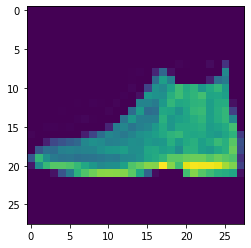

In [125]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

最后用 model.evaluate() 来看看模型在所有测试集上的表现。

In [126]:
built_model.evaluate( x_test, y_test )

313/313 [==============================] - 0s 619us/step - loss: 0.5657 - accuracy: 0.8099


[0.5656715035438538, 0.8098999857902527]

训练精度 81.71% 但是测试精度 80.99%. 如果测试精度明显低于训练精度，就有过拟合的征兆。这是需要用验证集了。

### 验证集

数据分三个集：<font color="pink"><b>训练集</b></font>（train），<font color="pink"><b>验证集</b></font>（validation），和<font color="pink"><b>测试集</b></font>（test）

我们将原来训练集前 5000 个当验证集，剩下的当训练集。

In [128]:
import tensorflow.keras as keras

data = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = data.load_data()

x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

这时来用回调函数关注验证精度 val_acc，一旦超过 90% 就停止训练。

In [144]:
import tensorflow.keras as keras

class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs)
        if logs.get('val_accuracy')>0.90:
            print("\nReached 85% validation accuracy so cancelling training!")
            self.model.stop_training = True

my_callback = MyCallback()

代码基本和上面一样，唯一区别是把 (x_valid, y_valid) 传到 model.fit() 中。

In [145]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense

model = keras.models.Sequential()

model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

np.random.seed(1024)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_valid, y_valid),
    callbacks=[my_callback]
)

Epoch 1/20
1719/1719 [==============================] - 1s 858us/step - loss: 0.5132 - accuracy: 0.8205 - val_loss: 0.4094 - val_accuracy: 0.8568
Epoch 2/20
1719/1719 [==============================] - 1s 848us/step - loss: 0.3888 - accuracy: 0.8604 - val_loss: 0.3548 - val_accuracy: 0.8738
Epoch 3/20
1719/1719 [==============================] - 1s 839us/step - loss: 0.3485 - accuracy: 0.8731 - val_loss: 0.3508 - val_accuracy: 0.8724
Epoch 4/20
1719/1719 [==============================] - 1s 819us/step - loss: 0.3222 - accuracy: 0.8811 - val_loss: 0.3306 - val_accuracy: 0.8836
Epoch 5/20
1719/1719 [==============================] - 1s 858us/step - loss: 0.3053 - accuracy: 0.8875 - val_loss: 0.3211 - val_accuracy: 0.8850
Epoch 6/20
1719/1719 [==============================] - 1s 844us/step - loss: 0.2892 - accuracy: 0.8936 - val_loss: 0.3251 - val_accuracy: 0.8850
Epoch 7/20
1719/1719 [==============================] - 1s 854us/step - loss: 0.2770 - accuracy: 0.8977 - val_loss: 0.3222 -

但是验证精度适中没有超过 90%，模型从头训练到完。

难道是我们的单层全连接模型太简单？现在数据集可不是 MNIST 而是 Fashion_MNIST 啊，服装的特征还是比数字的特征要丰富多了吧，再怎么样也要弄到卷积神经网络吧。

首先引进二维卷积层 Conv2D 和二维最大池化层 MaxPooling2D。在全连接层前我们放了两组 Conv2D + MaxPooling2D。

In [148]:
import tensorflow.keras as keras

data = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = data.load_data()

x_train_full = x_train_full.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [150]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

model = keras.models.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

np.random.seed(1024)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_valid, y_valid),
    # callbacks=[my_callback]
)

Epoch 1/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.4455 - accuracy: 0.8363 - val_loss: 0.3227 - val_accuracy: 0.8808
Epoch 2/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2984 - accuracy: 0.8889 - val_loss: 0.2754 - val_accuracy: 0.8950
Epoch 3/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2519 - accuracy: 0.9070 - val_loss: 0.2611 - val_accuracy: 0.9004
Epoch 4/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2157 - accuracy: 0.9205 - val_loss: 0.2318 - val_accuracy: 0.9142
Epoch 5/20
1719/1719 [==============================] - 35s 21ms/step - loss: 0.1920 - accuracy: 0.9280 - val_loss: 0.2431 - val_accuracy: 0.9110
Epoch 6/20
1719/1719 [==============================] - 35s 21ms/step - loss: 0.1678 - accuracy: 0.9375 - val_loss: 0.2295 - val_accuracy: 0.9178
Epoch 7/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.1471 - accuracy: 0.9440 - val_loss: 0.2484 -

效果一下子出来了，训练精度 98.66% 但是验证精度只有 91.62%，明显的过拟合。画个图看的更明显。

In [151]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

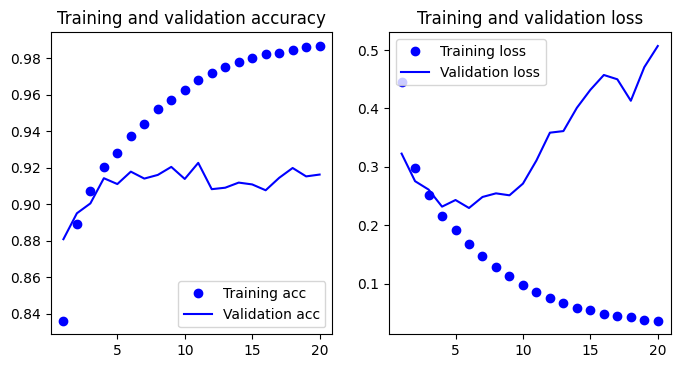

In [153]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8,4), dpi=100)

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

解决过拟合，可以用**Dropout**试试。代码和上面一摸一样，在第一个全连接层前加一个 Dropout 层（高亮强调出）。

In [154]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

model = keras.models.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),  # 在第一个全连接层前加一个 Dropout 层
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

np.random.seed(1024)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_valid, y_valid),
    # callbacks=[my_callback]
)

Epoch 1/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.5070 - accuracy: 0.8145 - val_loss: 0.3459 - val_accuracy: 0.8770
Epoch 2/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3549 - accuracy: 0.8702 - val_loss: 0.2930 - val_accuracy: 0.8936
Epoch 3/20
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3094 - accuracy: 0.8848 - val_loss: 0.2775 - val_accuracy: 0.8964
Epoch 4/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2825 - accuracy: 0.8956 - val_loss: 0.2526 - val_accuracy: 0.9044
Epoch 5/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2635 - accuracy: 0.9013 - val_loss: 0.2403 - val_accuracy: 0.9090
Epoch 6/20
1719/1719 [==============================] - 35s 21ms/step - loss: 0.2472 - accuracy: 0.9071 - val_loss: 0.2273 - val_accuracy: 0.9142
Epoch 7/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2386 - accuracy: 0.9103 - val_loss: 0.2164 -

虽然训练精度降到 93.97% 但是验证精度提高到 91.94%，Dropout 有效地抑制了过拟合。继续上图。

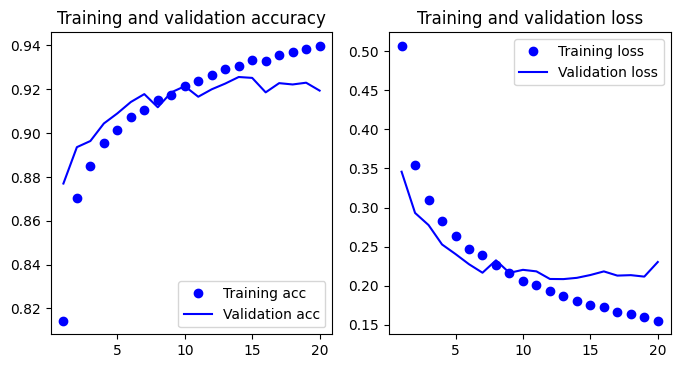

In [156]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8,4), dpi=100)

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<center> <h1>Keras 保存模型</h1> </center>

花费很长时间辛苦训练的模型不保存下次再从头开始训练太傻了。

对于用序列式和函数式构建的模型可以用 model.save() 来保存：

In [158]:
model.save("my_keras_model.h5")

加载可用 models 命名空间里面的 load_model() 函数：

In [160]:
model = keras.models.load_model("my_keras_model.h5")

用子类化构建的模型不能用上面的 save 和 load 来保存和加载，它对应的方式是

* save_weights()

* load_weights()

虽然没能保存模型所有的东西，但是保存了最重要的参数，这就够了。


<p style="text-align:right">Aug 6th, 2021</p>